In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.svm import SVC

import seaborn as sns



In [35]:
import joblib

**Read and shuffle the dataset**

In [36]:
df = pd.read_csv('/Users/Lenovo/Desktop/second year/prj1 dataset/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Hyphen from strings**

In [37]:
for col in df.columns:
    if df[col].dtype == 'object':  # Only process string columns
        df[col] = df[col].str.replace('_', ' ')

**Dataset characteristics**

In [38]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high fever,headache,nausea,abdominal pain,abdominal pain,yellowing of eyes,yellowing of eyes,irritability,malaise,muscle pain,chest pain,chest pain,blood in sputum,muscle pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


**Check for null and NaN values**

In [39]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


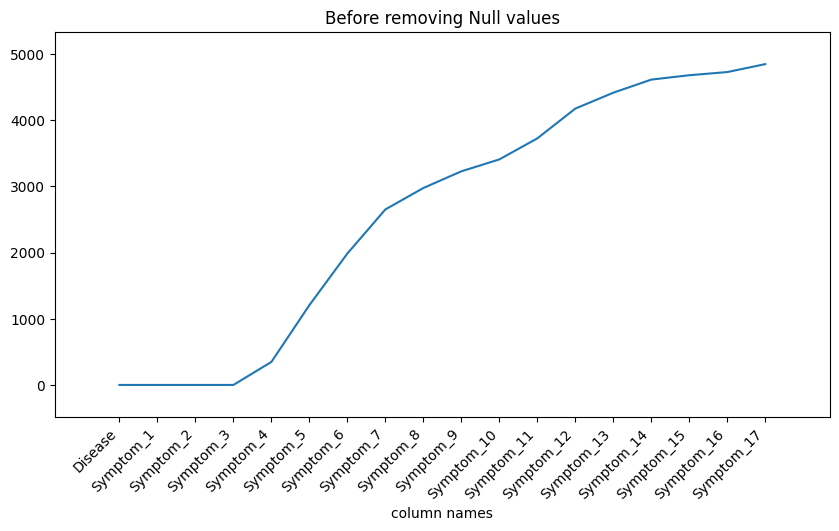

In [40]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('Before removing Null values')
plt.xlabel('column names')
plt.margins(0.1)
plt.show()

**Remove the trailing space from the symptom columns**

In [41]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Fill the NaN values with zero**

In [42]:
df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Symptom severity rank**

In [43]:
df1 = pd.read_csv('/Users/Lenovo/Desktop/second year/prj1 dataset/Symptom-severity.csv')
df1['Symptom'] = df1['Symptom'].str.replace('_',' ')
df1.head()

,Symptom,weight
0,itching,1
1,skin rash,3
2,nodal skin eruptions,4
3,continuous sneezing,4
4,shivering,5


**Get overall list of symptoms**

In [44]:
df1['Symptom'].unique()

array(['itching', 'skin rash', 'nodal skin eruptions',
       'continuous sneezing', 'shivering', 'chills', 'joint pain',
       'stomach pain', 'acidity', 'ulcers on tongue', 'muscle wasting',
       'vomiting', 'burning micturition', 'spotting urination', 'fatigue',
       'weight gain', 'anxiety', 'cold hands and feets', 'mood swings',
       'weight loss', 'restlessness', 'lethargy', 'patches in throat',
       'irregular sugar level', 'cough', 'high fever', 'sunken eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish skin', 'dark urine', 'nausea',
       'loss of appetite', 'pain behind the eyes', 'back pain',
       'constipation', 'abdominal pain', 'diarrhoea', 'mild fever',
       'yellow urine', 'yellowing of eyes', 'acute liver failure',
       'fluid overload', 'swelling of stomach', 'swelled lymph nodes',
       'malaise', 'blurred and distorted vision', 'phlegm',
       'throat irritation', 'redness of eyes', 'sinus pressu

**Encode symptoms in the data with the symptom rank**

In [45]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Assign symptoms with no rank to zero**

In [46]:
d = d.replace('dischromic  patches', 0)
d = d.replace('spotting  urination',0)
df = d.replace('foul smell of urine',0)
df.head(10)

/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_40664/969436745.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('dischromic  patches', 0)
/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_40664/969436745.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d = d.replace('spotting  urination',0)
/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_40664/969436745.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old 

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Check if entire columns have zero values so we can drop those values**

In [47]:
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4       0
Symptom_5       0
Symptom_6       0
Symptom_7       0
Symptom_8       0
Symptom_9       0
Symptom_10      0
Symptom_11      0
Symptom_12      0
Symptom_13      0
Symptom_14      0
Symptom_15      0
Symptom_16      0
Symptom_17      0


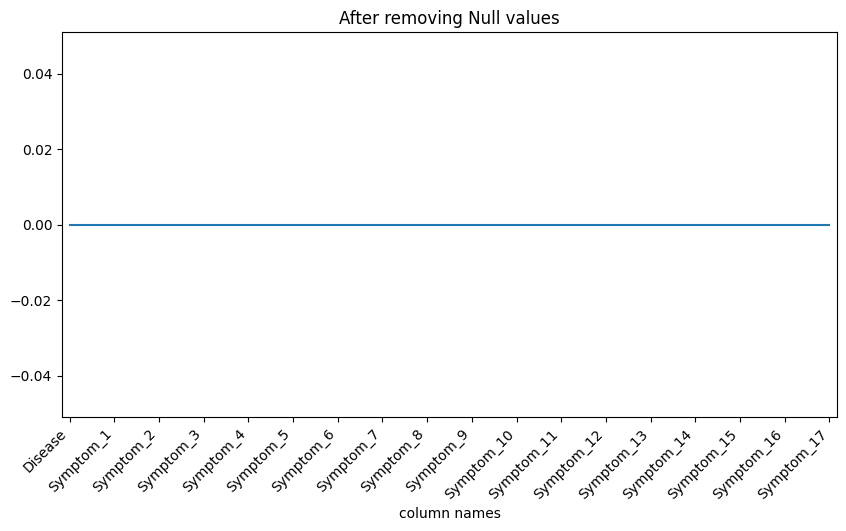

In [48]:
plt.figure(figsize=(10,5))
plt.plot(null_checker.index, null_checker['count'])
plt.xticks(null_checker.index, null_checker.index, rotation=45,
horizontalalignment='right')
plt.title('After removing Null values')
plt.xlabel('column names')
plt.margins(0.01)
plt.show()

In [49]:
print("Number of symptoms used to identify the disease ",len(df1['Symptom'].unique()))
print("Number of diseases that can be identified ",len(df['Disease'].unique()))

Number of symptoms used to identify the disease  132
Number of diseases that can be identified  41


**Get the names of diseases from data**

In [50]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

### Select the features as symptoms column and label as Disease column

Explination: A **feature** is an input; **label** is an output.
A feature is one column of the data in your input set. For instance, if you're trying to predict the type of pet someone will choose, your input features might include age, home region, family income, etc. The label is the final choice, such as dog, fish, iguana, rock, etc.

Once you've trained your model, you will give it sets of new input containing those features; it will return the predicted "label" (pet type) for that person.

In [51]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

## Splitting the dataset to training (80%) and testing (20%)

Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data is used for training, and a smaller portion of the data is used for testing. By using similar data for training and testing, you can minimize the effects of data discrepancies and better understand the characteristics of the model.
After a model has been processed by using the training set, we test the model by making predictions against the test set. Because the data in the testing set already contains known values for the attribute that you want to predict, it is easy to determine whether the model's guesses are correct.

* Train Dataset: Used to fit the machine learning model.
* Test Dataset: Used to evaluate the fit machine learning model.

In [52]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, train_size = 0.8,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


### Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a weighted average of the precision and
recall, where an F1 score reaches its best value at 1 and worst score at 0.
The relative contribution of precision and recall to the F1 score are
equal. The formula for the F1 score is

    F1 = 2 * (precision * recall) / (precision + recall)

# Decision Tree

# Random Forest

In [57]:
rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
rnd_forest.fit(x_train,y_train)
preds=rnd_forest.predict(x_test)
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_40664/2850264718.py", line 1, in <module>
    rnd_forest = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 500, max_depth=13)
NameError: name 'RandomForestClassifier' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/si

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_train =cross_val_score(rnd_forest, x_train, y_train, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_train,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_train.mean()*100.0, rnd_forest_train.std()*100.0))

In [ ]:
kfold = KFold(n_splits=10,shuffle=True,random_state=42)
rnd_forest_test =cross_val_score(rnd_forest, x_test, y_test, cv=kfold, scoring='accuracy')
pd.DataFrame(rnd_forest_test,columns=['Scores'])
print("Mean Accuracy: %.3f%%, Standard Deviation: (%.2f%%)" % (rnd_forest_test.mean()*100.0, rnd_forest_test.std()*100.0))

# Fucntion to manually test the models

In [ ]:
discrp = pd.read_csv("/Users/Lenovo/Desktop/second year/prj1 dataset/symptom_Description.csv")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_10009/2086949622.py", line 1, in <module>
    discrp = pd.read_csv("/Users/Lenovo/Desktop/second year/prj1 dataset/symptom_Description.csv")
NameError: name 'pd' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb

In [ ]:
discrp.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_10009/929186055.py", line 1, in <module>
    discrp.head()
NameError: name 'discrp' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1326, in structured_traceback
    return VerboseTB.structured_trace

In [ ]:
ektra7at = pd.read_csv("/Users/Lenovo/Desktop/second year/prj1 dataset/symptom_precaution.csv")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_10009/2527559710.py", line 1, in <module>
    ektra7at = pd.read_csv("/Users/Lenovo/Desktop/second year/prj1 dataset/symptom_precaution.csv")
NameError: name 'pd' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultrat

In [ ]:
ektra7at.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


**Save Random Forest model**

In [ ]:
# save
joblib.dump(rfc, "/kaggle/working/random_forest.joblib")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_10009/2236264918.py", line 2, in <module>
    joblib.dump(rfc, "/kaggle/working/random_forest.joblib")
NameError: name 'joblib' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1326, in structured_tra

**Load Model**

In [ ]:
# load, no need to initialize the loaded_rf
loaded_rf = joblib.load("/kaggle/working/random_forest.joblib")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_10009/639638582.py", line 2, in <module>
    loaded_rf = joblib.load("/kaggle/working/random_forest.joblib")
NameError: name 'joblib' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1326, in structur

In [ ]:
def predd(x,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17):
    psymptoms = [S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17]
    #print(psymptoms)
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]
    psy = [psymptoms]
    pred2 = x.predict(psy)
    disp= discrp[discrp['Disease']==pred2[0]]
    disp = disp.values[0][1]
    recomnd = ektra7at[ektra7at['Disease']==pred2[0]]
    c=np.where(ektra7at['Disease']==pred2[0])[0][0]
    precuation_list=[]
    for i in range(1,len(ektra7at.iloc[c])):
          precuation_list.append(ektra7at.iloc[c,i])
    print("The Disease Name: ",pred2[0])
    print("The Disease Discription: ",disp)
    print("Recommended Things to do at home: ")
    for i in precuation_list:
        print(i)

# Comparison between algorithms testing and training

In [ ]:
n_groups = 2
algorithms = ('Decision Tree', 'Random Forest')
train_accuracy = (DS_train.mean()*100.0,
                 rnd_forest_train.mean()*100.0,)

NameError: name 'DS_train' is not defined

In [ ]:
test_accuracy = (DS_test.mean()*100.0,
                 rnd_forest_test.mean()*100.0)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_10009/3250695714.py", line 1, in <module>
    test_accuracy = (DS_test.mean()*100.0,
NameError: name 'DS_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1326, in structured_traceback
    return

In [ ]:
Standard_Deviation=(DS_test.std()*100.0,     
                 rnd_forest_test.std()*100.0)

In [ ]:
# create plot
fig, ax = plt.subplots(figsize=(15, 10))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
rects3 = plt.bar(index + bar_width, Standard_Deviation, bar_width, alpha = opacity, color='red', label='Standard Deviation')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(Standard_Deviation):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))    

**Test it Like The user would do**

In [ ]:
sympList=df1["Symptom"].to_list()
predd(rnd_forest,sympList[7],sympList[5],sympList[2],sympList[90],0,0,0,0,0,0,0,0,0,0,0,0,0)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/dr/5832qf191n3cpbfdp95yqc700000gn/T/ipykernel_10009/3025195112.py", line 1, in <module>
    sympList=df1["Symptom"].to_list()
NameError: name 'df1' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 2144, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1435, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/Users/Lenovo/Library/Python/3.9/lib/python/site-packages/IPython/core/ultratb.py", line 1326, in structured_traceback
    return VerboseT